In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

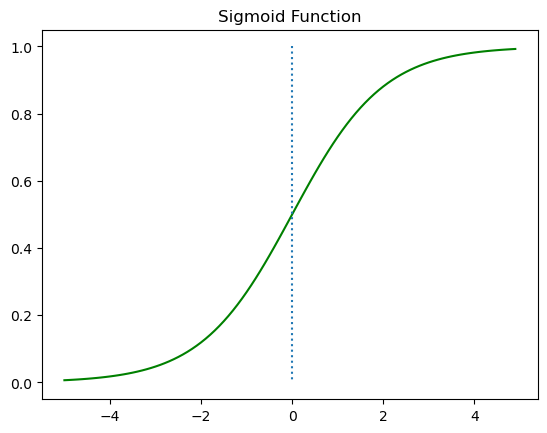

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

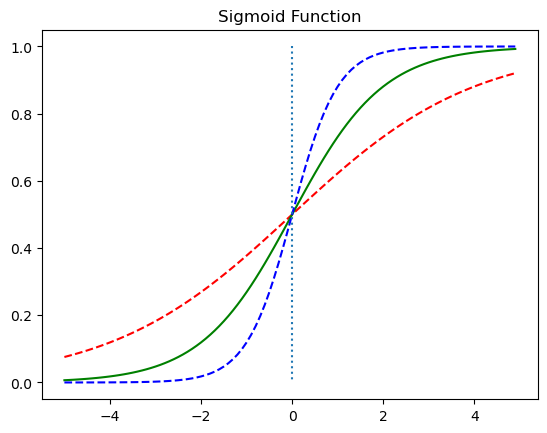

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

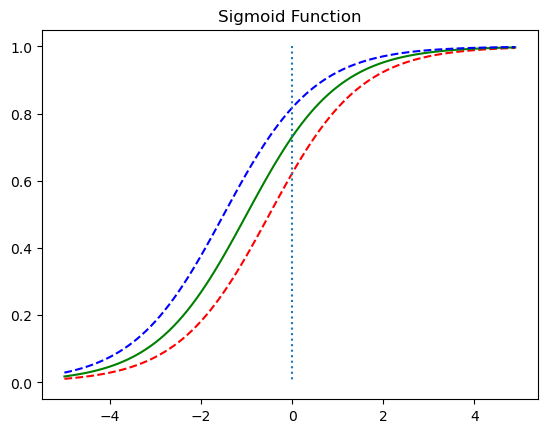

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [6]:
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim as optim

In [15]:
torch.manual_seed(1)

In [16]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [17]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [18]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [19]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [21]:
cost = (-(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))).mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [22]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [23]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=1)
epochs = 1000
for epoch in range(epochs + 1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = (-(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))).mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [25]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [26]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
